## Problem Statement
A company focused on enhancing financial literacy and awareness through AI and ML, aims to automate the categorization of news articles from its internal database. The objective is to build a Natural Language Processing (NLP) system that can classify news articles into predefined categories such as politics, technology, sports, business, and entertainment. This project involves developing and comparing the performance of at least three different machine learning models for text classification to determine the most effective approach for accurate and scalable news categorization.

In [44]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
import contractions

# for wordcloud
from wordcloud import WordCloud, STOPWORDS

# To use Natural Language Processing
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# For tokenization
from nltk.tokenize import word_tokenize,sent_tokenize,TweetTokenizer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')
nltk.download('treebank')

# To remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

# for stemming
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
# For lemmetization
from nltk import WordNetLemmatizer
nltk.download('wordnet')

# For BoW & TF-IDF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# For encoding the categorical variable
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# To try out different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression 

from sklearn.metrics import classification_report, confusion_matrix


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_d

In [5]:
df = pd.read_csv(r'D:\Github\text_clasification_nlp\dataset\news-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
#Shape of the dataset
print("Shape of the dataset: ", df.shape)
#Check for null values
print("Null values in the dataset: ", df.isnull().sum())
#Check for duplicate values
print("Duplicate values in the dataset: ", df.duplicated().sum())   
#Check the data types of the columns
print("Data types of the columns: ", df.dtypes)
#Check the unique values in the target column
print("Unique values in the target column: ", df['Category'].unique())
#Check the distribution of the target column
print("Distribution of the target column: ", df['Category'].value_counts()) 


Shape of the dataset:  (2225, 2)
Null values in the dataset:  Category    0
Article     0
dtype: int64
Duplicate values in the dataset:  99
Data types of the columns:  Category    object
Article     object
dtype: object
Unique values in the target column:  ['Technology' 'Business' 'Sports' 'Entertainment' 'Politics']
Distribution of the target column:  Category
Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: count, dtype: int64


In [10]:
#check for duplicates
df[df.duplicated(keep=False)].sort_values(by=['Category', 'Article'])

,Category,Article
165,Business,economy strong in election year uk businesse...
543,Business,economy strong in election year uk businesse...
1518,Business,jobs growth still slow in the us the us create...
2055,Business,jobs growth still slow in the us the us create...
430,Business,s korea spending boost to economy south korea ...
...,...,...
1774,Technology,warning over tsunami aid website net users are...
109,Technology,web radio takes spanish rap global spin the ra...
956,Technology,web radio takes spanish rap global spin the ra...
1110,Technology,what high-definition will do to dvds first it ...


In [11]:
df.drop_duplicates(subset=['Article'], keep='first', inplace=True)
#Check for duplicates again     
print("Duplicate values in the dataset after removing duplicates: ", df.duplicated().sum())
#Check the shape of the dataset after removing duplicates   
print("Shape of the dataset after removing duplicates: ", df.shape)
#Check for null values again
print("Null values in the dataset after removing duplicates: ", df.isnull().sum())

Duplicate values in the dataset after removing duplicates:  0
Shape of the dataset after removing duplicates:  (2126, 2)
Null values in the dataset after removing duplicates:  Category    0
Article     0
dtype: int64


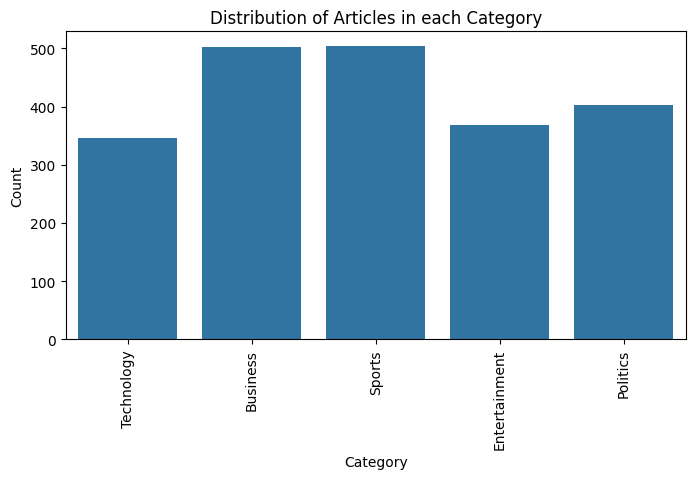

In [15]:
#check the distribution of articles in each category

plt.figure(figsize=(8, 4))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Articles in each Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [17]:
#train test split with stratified sampling

X = df['Article']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#Check the shape of the train and test sets
print("Shape of the train set: ", X_train.shape)
print("Shape of the test set: ", X_test.shape)

Shape of the train set:  (1700,)
Shape of the test set:  (426,)


In [18]:
#convert the train and test sets to dataframe
X_train = pd.DataFrame(X_train,columns=["Article"])
y_train = pd.DataFrame(y_train,columns=["Category"])
X_test = pd.DataFrame(X_test,columns=["Article"])
y_test = pd.DataFrame(y_test,columns=["Category"])

## Text Processing

In [ ]:
# Function to expand contractions
import string

# Function to remove non-letters
def remove_non_letters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Function to preprocess text
def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Expand contractions
    text = contractions.fix(text)
    
    # Step 3: Remove non-letter characters (keep spaces)
    text = remove_non_letters(text)
    
    # Step 4: Tokenization
    words = word_tokenize(text)
    
    # Step 5: Remove stop words
    english_stop_words = set(stopwords.words('english'))
    words = [word for word in words if (word not in english_stop_words) and (word not in string.punctuation) ]
    
    # Step 6: Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Step 7: Join the words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text

In [32]:
sample = "I'll see you at the party, won't I? It's going to be great!"
print("Original text: ", sample)
print("processed text: ", preprocess_text(sample))

Original text:  I'll see you at the party, won't I? It's going to be great!
processed text:  see party going great


In [33]:
# check expanded contractions
sample = "I'll see you at the party, won't I? It's going to be great!"
print("Original text: ", sample)
print("Expanded contractions: ", contractions.fix(sample))

Original text:  I'll see you at the party, won't I? It's going to be great!
Expanded contractions:  I will see you at the party, will not I? It is going to be great!


In [35]:
X_train['Article'] = X_train['Article'].apply(preprocess_text)
X_test['Article'] = X_test['Article'].apply(preprocess_text)

#check the first 5 rows of the train set
print(X_train.head())

#check the first 5 rows of the test set
print(X_test.head())

                                                Article
1007  child access law shakeup planned parent refuse...
1709  assembly ballot paper missing hundred ballot p...
602   pension hitch longliving men male life expecta...
1608  final hunt held ban loom hunt england wale beg...
1232  arsenal penalty arsenal win penalty spanish go...
                                                Article
1741  state act stop spammer state texas filed lawsu...
595   branson show flop screen entrepreneur sir rich...
1710  stevens named england lineup england named bat...
1580  bookmaker back aviator oscar aviator tipped uk...
1359  howard taunt blair split tony blair feud gordo...


## Encoding Category column

In [37]:
# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training data
y_train['Category'] = label_encoder.fit_transform(y_train['Category'])
# Transform the test data
y_test['Category'] = label_encoder.transform(y_test['Category'])

# Check the unique values in the target column after encoding
print("Unique values in the target column after encoding: ", y_train['Category'].unique())

Unique values in the target column after encoding:  [2 0 3 4 1]


## Vectorize Data

In [41]:
#choose between Bag of Words and TF-IDF techniques for vectorizing the data.
#Bag of Words
# Initialize CountVectorizer
def vectorize_data(X_train, X_test, vectorizer = 'tfidf'):
    if vectorizer == 'tfidf':
        vectorizer = TfidfVectorizer(max_features=5000)
    elif vectorizer == 'bow':
        vectorizer = CountVectorizer(max_features=5000)
    # Fit the vectorizer on the training data
    X_train_vectorized = vectorizer.fit_transform(X_train['Article']).toarray()
    # Transform the test data
    X_test_vectorized = vectorizer.transform(X_test['Article']).toarray()

    return X_train_vectorized, X_test_vectorized

# Vectorize the data
X_train_vectorized, X_test_vectorized = vectorize_data(X_train, X_test, vectorizer = 'tfidf')



In [42]:
X_train_vectorized.shape, X_test_vectorized.shape

((1700, 5000), (426, 5000))

## Naive Bayes classifier model using the simple/classical approach.

In [48]:
## Naive Bayes Classifier
# Initialize the model
nb_model = MultinomialNB()
# Fit the model on the training data
nb_model.fit(X_train_vectorized, y_train['Category'])
# Predict on the test data
y_pred_nb = nb_model.predict(X_test_vectorized)

               precision    recall  f1-score   support

     Business       0.93      0.99      0.96       101
Entertainment       0.99      0.95      0.97        74
     Politics       0.96      0.98      0.97        81
       Sports       0.99      1.00      1.00       101
   Technology       1.00      0.93      0.96        69

     accuracy                           0.97       426
    macro avg       0.97      0.97      0.97       426
 weighted avg       0.97      0.97      0.97       426



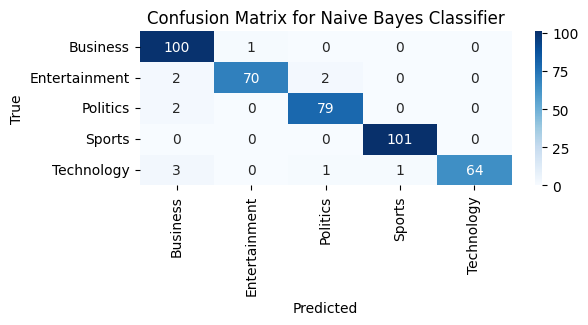

In [50]:

#classification report
print(classification_report(y_test['Category'], y_pred_nb, target_names=label_encoder.classes_))
#confusion matrix
cm = confusion_matrix(y_test['Category'], y_pred_nb)
plt.figure(figsize=(6, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Decision Tree, Nearest Neighbors, Random Forest

# Decision Tree Classifier

               precision    recall  f1-score   support

     Business       0.78      0.88      0.83       101
Entertainment       0.81      0.80      0.80        74
     Politics       0.90      0.80      0.85        81
       Sports       0.95      0.94      0.95       101
   Technology       0.70      0.68      0.69        69

     accuracy                           0.83       426
    macro avg       0.83      0.82      0.82       426
 weighted avg       0.84      0.83      0.83       426



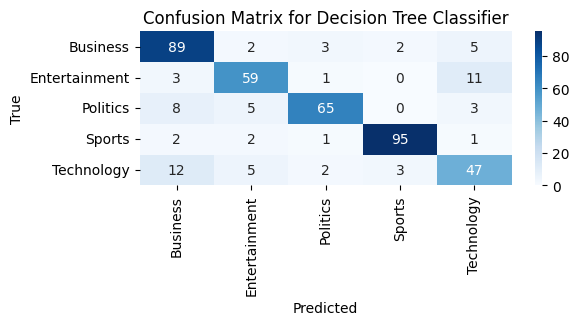

In [51]:
# Initialize DT model
dt_model = DecisionTreeClassifier(random_state=42)
# Fit the model on the training data
dt_model.fit(X_train_vectorized, y_train['Category'])
# Predict on the test data
y_pred_dt = dt_model.predict(X_test_vectorized)
#classification report
print(classification_report(y_test['Category'], y_pred_dt, target_names=label_encoder.classes_))
#confusion matrix
cm = confusion_matrix(y_test['Category'], y_pred_dt)
plt.figure(figsize=(6, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# NEAREST NEIGHBORS CLASSIFIER


               precision    recall  f1-score   support

     Business       0.94      0.96      0.95       101
Entertainment       0.94      0.89      0.92        74
     Politics       0.93      0.98      0.95        81
       Sports       0.98      0.99      0.99       101
   Technology       0.97      0.93      0.95        69

     accuracy                           0.95       426
    macro avg       0.95      0.95      0.95       426
 weighted avg       0.95      0.95      0.95       426



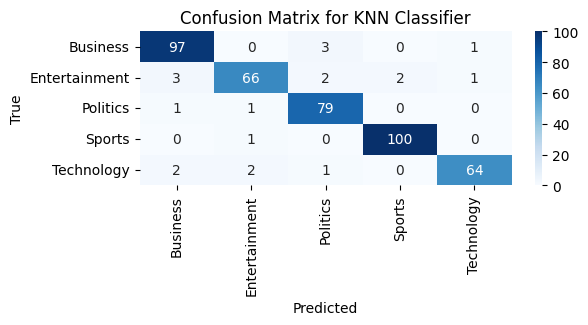

In [53]:
# Initialize knn model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Fit the model on the training data
knn_model.fit(X_train_vectorized, y_train['Category'])
# Predict on the test data
y_pred_knn = knn_model.predict(X_test_vectorized)
#classification report
print(classification_report(y_test['Category'], y_pred_knn, target_names=label_encoder.classes_))
#confusion matrix
cm = confusion_matrix(y_test['Category'], y_pred_knn)
plt.figure(figsize=(6, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# RANDOM FOREST CLASSIFIER

               precision    recall  f1-score   support

     Business       0.90      0.98      0.94       101
Entertainment       1.00      0.93      0.97        74
     Politics       0.99      0.94      0.96        81
       Sports       0.97      1.00      0.99       101
   Technology       0.97      0.93      0.95        69

     accuracy                           0.96       426
    macro avg       0.97      0.96      0.96       426
 weighted avg       0.96      0.96      0.96       426



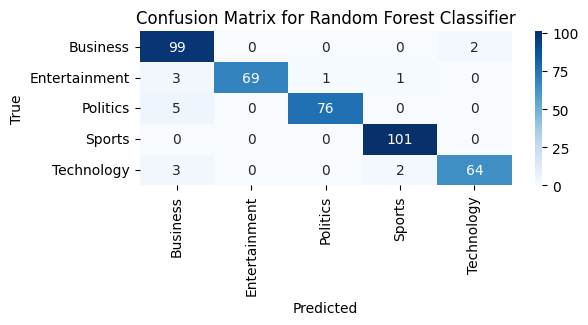

In [54]:
# Initialize RF model
rf_model = RandomForestClassifier(random_state=42)
# Fit the model on the training data
rf_model.fit(X_train_vectorized, y_train['Category'])
# Predict on the test data
y_pred_rf = rf_model.predict(X_test_vectorized)
#classification report
print(classification_report(y_test['Category'], y_pred_rf, target_names=label_encoder.classes_))
#confusion matrix
cm = confusion_matrix(y_test['Category'], y_pred_rf)
plt.figure(figsize=(6, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Observations**

*Naive Bayes achieved the highest accuracy (97%) with strong F1-scores across all classes, especially Sports (1.00) and Politics (0.97), making it surprisingly effective for text classification.*

*Random Forest closely followed with 96% accuracy, showing robust and consistent performance across all categories, with high precision and recall, especially in Sports, Politics, and Entertainment.*

*KNN performed very well with 95% accuracy, maintaining high F1-scores in all classes, but had a slightly lower recall for Entertainment (0.89); performance may degrade with large datasets.*

*Decision Tree had the lowest accuracy (83%) and F1-scores, particularly weak in Technology (0.69) and Business (0.83), indicating potential overfitting and poor generalization.*

*All models performed best on the Sports class, indicating that it was likely the most distinguishable category in the dataset.*

*Technology was the most challenging class across models, with slightly lower recall or F1-scores, possibly due to overlapping features with other categories.*

*Overall, Naive Bayes and Random Forest are the most reliable models for this classification task, with Decision Tree being the least effective.*

**Questionnaire:**

1. How many news articles are present in the dataset that we have? **-->** *2126 excluding 99 duplicate articles*

2. Most of the news articles are from *Sports & Business* category.

3. Only *401* no. of articles belong to the ‘Technology’ category.

4. What are Stop Words and why should they be removed from the text data? **-->** *Stop Words are commonly occurring words such as "the", "is", and "and" that do not add significant meaning to a text. Removing stop words from text data helps reduce noise and enhances computational efficiency, making tasks like text classification and sentiment analysis more effective.*

5. Explain the difference between Stemming and Lemmatization? **-->** *Stemming reduces words to their root by removing suffixes, often resulting in non-dictionary words (e.g., "running" → "run").*
*Lemmatization converts words to their base or dictionary form (lemma), ensuring meaningful words as output (e.g., "running" → "run"). While lemmatization is more accurate, it is computationally more expensive than stemming.*

6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other? **-->** *TF-IDF (Term Frequency-Inverse Document Frequency) is generally more efficient than Bag of Words (BoW) because it accounts for word importance in relation to the entire corpus, reducing the influence of commonly occurring words while improving classification performance.*

7. What’s the shape of train & test data sets after performing a 75:25 split? **-->** *1595 & 531*

8. Which of the following is found to be the best performing model? **-->** *Naive Bayes*

9. According to this particular use case, both precision and recall are equally important. (T/F) **-->** *True. Since this use case involves classifying news articles into multiple categories, both precision (correct classification of relevant articles) and recall (ensuring no relevant article is missed) are equally important for balanced performance.*